In [1]:
import matplotlib.pyplot as plt
from visualizer import print_result, display_stocks_graph

In [2]:
import os
from import_stocks import read_stock_symbols
from yahoo_data_provider import get_yahoo_data

# Define the base path relative to the current working directory
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'assets'))
stocks_symbol_list_path = os.path.join(base_path, 'nasdaq_100_stocks.csv')


######### Define no of stocks ###############3
no_of_stocks = 6


stocks = read_stock_symbols(stocks_symbol_list_path, num_symbols=no_of_stocks)
start_date=(2018, 1, 1)
end_date=(2020, 1, 1)

data, tickers, mu, sigma = get_yahoo_data(stocks, start_date, end_date)

print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

Stocks:  ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA']
Mean return:  [0.00127331 0.00139123 0.00058917 0.00057577 0.00105956 0.00075576]
Covariance:  [[0.00030072 0.00017684 0.00017932 0.00017642 0.00020524 0.00026963]
 [0.00017684 0.00023657 0.00018949 0.00018884 0.00022097 0.00026415]
 [0.00017932 0.00018949 0.00027228 0.00026919 0.00021745 0.00026808]
 [0.00017642 0.00018884 0.00026919 0.00026873 0.00021548 0.00026709]
 [0.00020524 0.00022097 0.00021745 0.00021548 0.00036201 0.00032911]
 [0.00026963 0.00026415 0.00026808 0.00026709 0.00032911 0.00080825]]


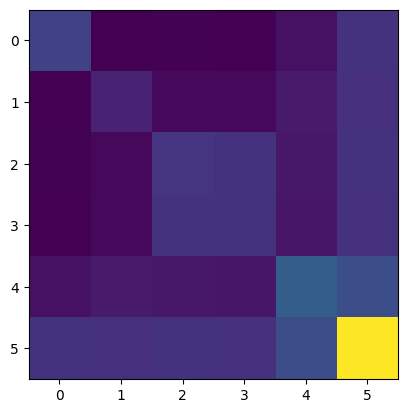

In [3]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

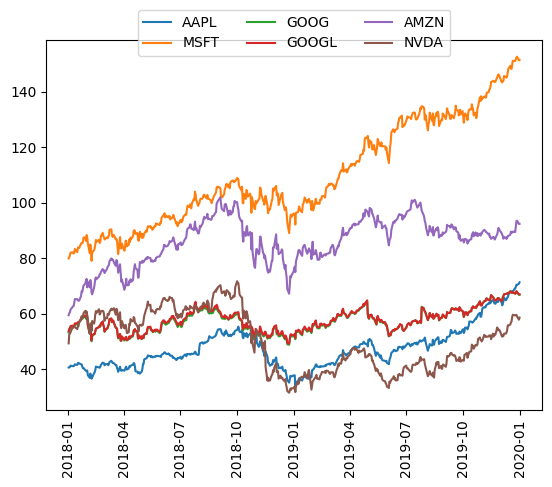

In [4]:
display_stocks_graph(data)

In [5]:
from portfolio import define_portfolio_optimization_problem

q = 0.5  # set risk factor
budget = 3  # set budget

portfolio, portfolio_quadratic_program = define_portfolio_optimization_problem(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
print("Portfolio Quadratic Program: ", portfolio_quadratic_program)

Portfolio Quadratic Program:  minimize 0.00015036053633191995*x_0^2 + 0.00017683610435857537*x_0*x_1 + 0.00017932038342170412*x_0*x_2 + 0.0001764193669201214*x_0*x_3 + 0.00020524325500128964*x_0*x_4 + 0.00026963494819566504*x_0*x_5 + 0.00011828314023301261*x_1^2 + 0.0001894923452698261*x_1*x_2 + 0.00018884381278059959*x_1*x_3 + 0.00022096603973371712*x_1*x_4 + 0.0002641529067524061*x_1*x_5 + 0.00013614208488725064*x_2^2 + 0.0002691932746040337*x_2*x_3 + 0.00021744609204961274*x_2*x_4 + 0.0002680824140200604*x_2*x_5 + 0.00013436266419996728*x_3^2 + 0.0002154780313894813*x_3*x_4 + 0.00026709294620784506*x_3*x_5 + 0.00018100406096977167*x_4^2 + 0.0003291135452581761*x_4*x_5 + 0.00040412735119337934*x_5^2 - 0.0012733087422818331*x_0 - 0.0013912260127259548*x_1 - 0.000589172999480696*x_2 - 0.0005757652860410011*x_3 - 0.0010595567458522577*x_4 - 0.0007557629855876343*x_5 (6 variables, 1 constraints, 'Portfolio optimization')


In [6]:
from solver import solve_using_sampling_vqe

num_stocks = len(stocks)
result = solve_using_sampling_vqe(portfolio_quadratic_program, num_stocks)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 0. 1.], value -0.0020
Optimal Companies: ['AAPL', 'MSFT', 'NVDA']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 1 1 0 0]	-0.0015		0.8271
[1 0 1 0 1 0]	-0.0019		0.0234
[1 1 1 0 0 1]	-0.0019		0.0215
[0 0 1 1 0 0]	-0.0006		0.0205
[0 0 1 1 1 0]	-0.0011		0.0137
[1 0 0 0 1 0]	-0.0018		0.0137
[0 1 0 1 1 0]	-0.0020		0.0137
[1 1 0 0 0 1]	-0.0020		0.0117
[1 0 1 0 1 1]	-0.0013		0.0107
[0 1 1 1 1 1]	-0.0010		0.0059
[0 0 0 1 1 0]	-0.0011		0.0049
[0 0 1 0 1 1]	-0.0009		0.0029
[0 0 1 0 0 1]	-0.0005		0.0029
[0 0 1 1 0 1]	-0.0004		0.0029
[0 1 0 0 0 1]	-0.0014		0.0020
[0 1 1 1 0 1]	-0.0011		0.0020
[1 0 0 1 1 1]	-0.0013		0.0020
[0 0 0 0 1 1]	-0.0009		0.0020
[0 1 1 0 0 1]	-0.0014		0.0020
[0 1 1 0 1 0]	-0.0020		0.0020
[1 0 1 1 1 1]	-0.0009		0.0020
[0 0 0 1 0 0]	-0.0004		0.0020
[1 0 0 0 0 0]	-0.0011		0.0010
[1 0 0 0 0 1]	-0.0012		0.0010
[1 1 0 0 0 0]	-0.0022		0.0010
[0 0 0 0 0 1]	-0.0

In [7]:
from solver import solve_using_qaoa

num_stocks = len(stocks)
result = solve_using_qaoa(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1. 0.], value -0.0027
Optimal Companies: ['AAPL', 'MSFT', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 1 0 1 0]	-0.0020		0.0557
[0 0 0 1 1 1]	-0.0009		0.0557
[0 1 0 1 1 0]	-0.0020		0.0518
[0 0 1 1 1 0]	-0.0011		0.0508
[0 1 1 0 0 1]	-0.0014		0.0508
[1 0 1 0 0 1]	-0.0012		0.0498
[0 1 1 1 0 0]	-0.0015		0.0459
[1 0 0 1 0 1]	-0.0012		0.0459
[1 1 0 1 0 0]	-0.0023		0.0449
[1 0 1 0 1 0]	-0.0019		0.0449
[1 1 0 0 1 0]	-0.0027		0.0430
[0 1 0 1 0 1]	-0.0013		0.0410
[1 0 0 0 1 1]	-0.0015		0.0410
[0 0 1 0 1 1]	-0.0009		0.0391
[1 1 0 0 0 1]	-0.0020		0.0371
[0 0 1 1 0 1]	-0.0004		0.0361
[1 1 1 0 0 0]	-0.0023		0.0342
[1 0 1 1 0 0]	-0.0014		0.0332
[1 0 0 1 1 0]	-0.0018		0.0303
[0 1 0 0 1 1]	-0.0017		0.0293
[0 0 0 0 1 1]	-0.0009		0.0098
[0 1 1 1 0 1]	-0.0011		0.0068
[1 0 1 0 0 0]	-0.0014		0.0068
[0 0 1 0 1 0]	-0.0011		0.0059
[0 1 1 0 0 0]	-0.0015		0.0059
[1 1 0 0 0 0]	-0.0

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from get_optimal_stocks import *



def fetch_stock_data(stock_symbols, start, end):
    stock_data = {}
    for stock_symbol in stock_symbols:
        try:
            stock_df = yf.download(stock_symbol, start=start, end=end)
            stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']
            stock_data[stock_symbol] = stock_df
        except Exception as e:
            print(f"Error retrieving data for symbol: {stock_symbol}. Error message: {e}")
    return stock_data

def calculate_portfolio_stats(stock_data, confidence_level, num_ports=5000):
    stock_symbols = list(stock_data.keys())
    close_data = {symbol: stock_data[symbol]['Adj Close'] for symbol in stock_symbols}
    stocks = pd.DataFrame(close_data)
    log_ret = np.log(stocks / stocks.shift(1))

    np.random.seed(101)
    all_weights = np.zeros((num_ports, len(stock_symbols)))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)
    cvar_arr = np.zeros(num_ports)

    for ind in range(num_ports):
        weights = np.random.random(len(stock_symbols))
        # print("Random Weights: ", weights)
        # weights = np.array([0.4, 0.4, 0.2])
        weights /= np.sum(weights)
        
        all_weights[ind, :] = weights
        ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
        vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
        sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
        
        portfolio_returns = log_ret.dot(weights).dropna()
        VaR = np.percentile(portfolio_returns, (1-confidence_level) * 100)
        cvar_arr[ind] = portfolio_returns[portfolio_returns <= VaR].mean()

    max_sr_idx = sharpe_arr.argmax()
    optimal_weights = all_weights[max_sr_idx, :]

    return {
        "optimal_weights": optimal_weights,
        "expected_return": ret_arr[max_sr_idx],
        "expected_volatility": vol_arr[max_sr_idx],
        "sharpe_ratio": sharpe_arr[max_sr_idx],
        "cvar": cvar_arr[max_sr_idx],
        "all_weights": all_weights,
        "ret_arr": ret_arr,
        "vol_arr": vol_arr,
        "sharpe_arr": sharpe_arr
    }

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Optimal Weights: [0.13828433 0.85562342 0.00609225]
Expected Return: 31.48%
Expected Volatility: 23.72%
Sharpe Ratio: 1.33
CVaR (95%): -3.56%
Values to be invested in each stock for portfolio of value 1000000 $
AAPL : $138284.33
MSFT : $855623.42
AMZN : $6092.25


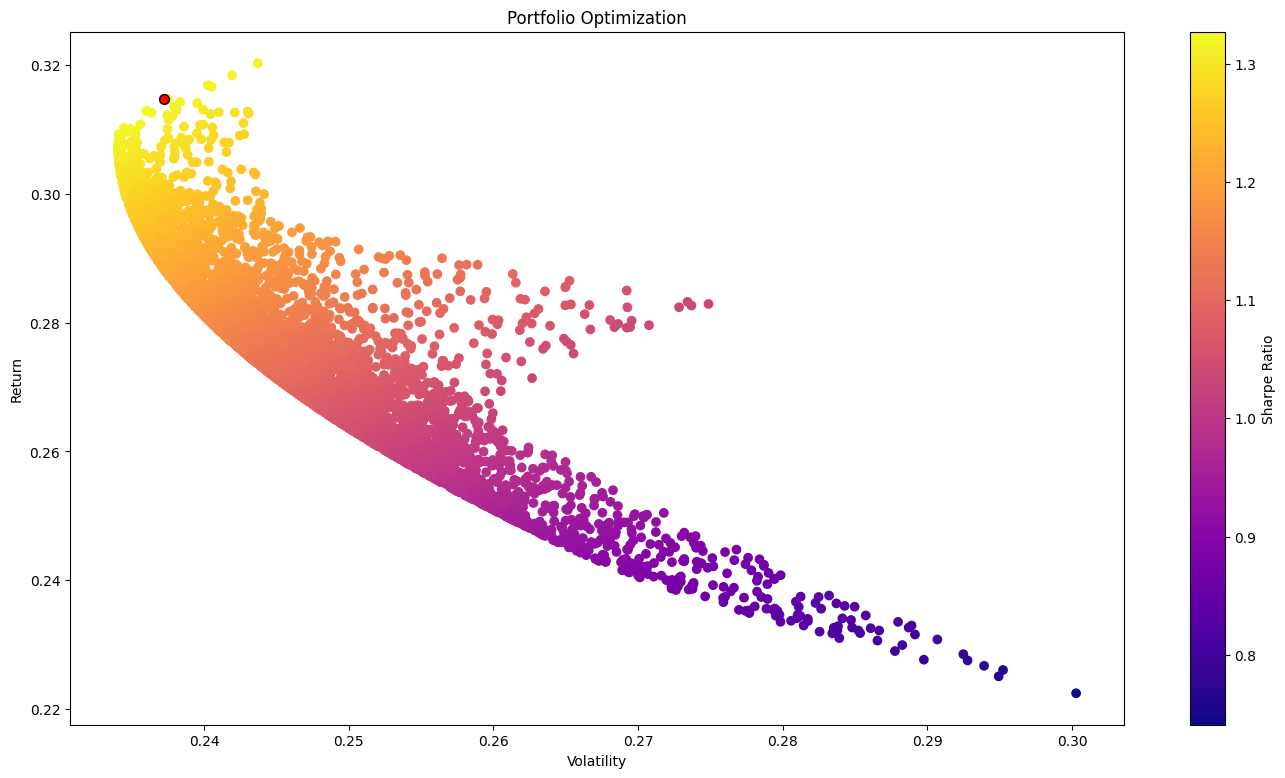

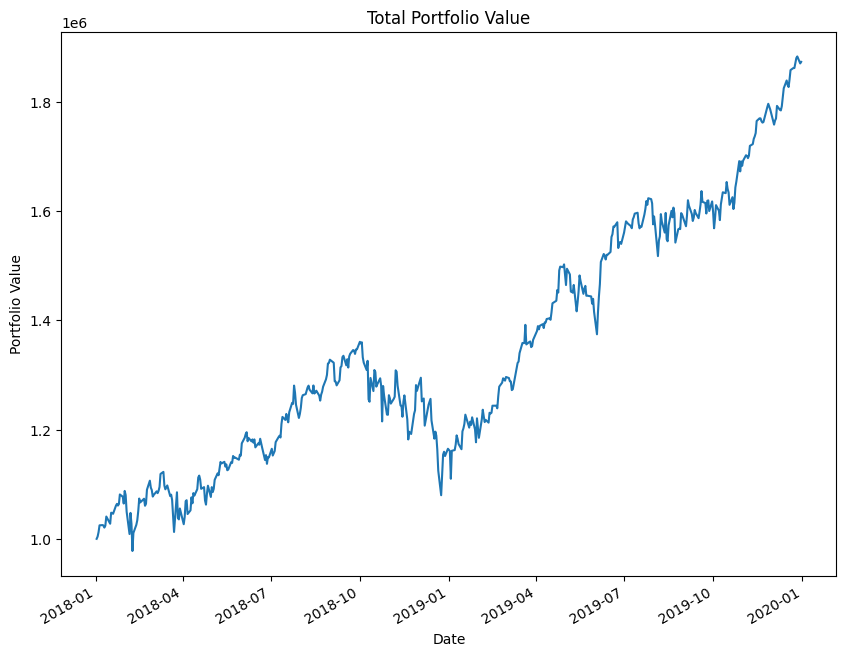

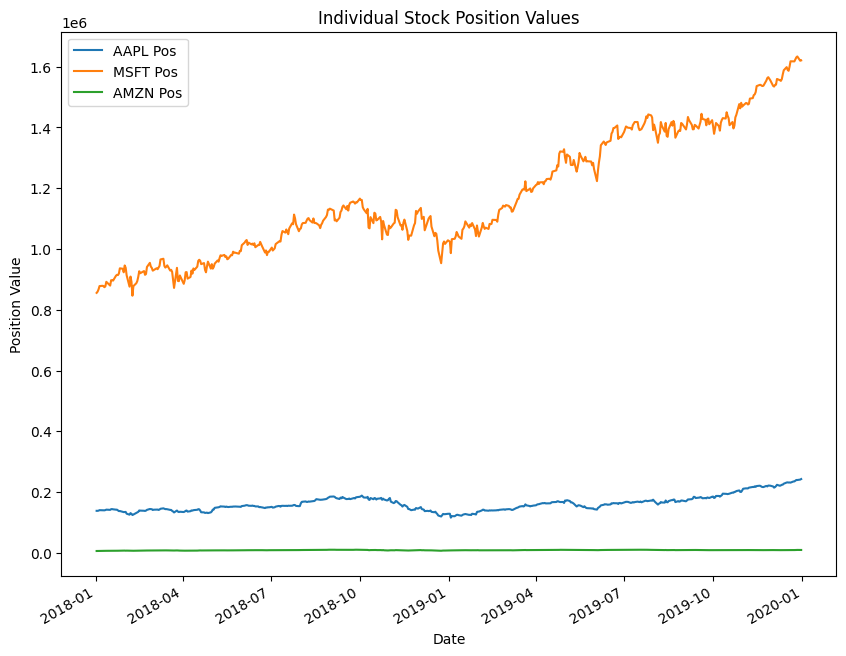

Our cumulative return is 87.30122500995212 percent!


/tmp/ipykernel_23834/3285111144.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)


In [9]:
def main():
    stock_symbols = get_optimal_stocks(tickers, result)
    start = datetime(*start_date)
    end = datetime(*end_date)
    Portfolio_total_value = 1000000  # Total portfolio value in dollars
    confidence_level = 0.95

    stock_data = fetch_stock_data(stock_symbols, start, end)
    results = calculate_portfolio_stats(stock_data, confidence_level)

    print(f"Optimal Weights: {results['optimal_weights']}")
    print(f"Expected Return: {results['expected_return'] * 100:.2f}%")
    print(f"Expected Volatility: {results['expected_volatility'] * 100:.2f}%")
    print(f"Sharpe Ratio: {results['sharpe_ratio']:.2f}")
    print(f"CVaR (95%): {results['cvar'] * 100:.2f}%")
    print(f"Values to be invested in each stock for portfolio of value {Portfolio_total_value} $")
    for i, symbol in enumerate(stock_symbols):
        print(f'{symbol} : ${results["optimal_weights"][i] * Portfolio_total_value:.2f}')

    # Visualization
    plt.figure(figsize=(17, 9))
    plt.scatter(results['vol_arr'], results['ret_arr'], c=results['sharpe_arr'], cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.scatter(results['vol_arr'][results['sharpe_arr'].argmax()], results['ret_arr'][results['sharpe_arr'].argmax()], c='red', s=50, edgecolors='black')
    plt.title('Portfolio Optimization')
    plt.show()

    # Combine the position values into a single DataFrame and calculate the total position
    portfolio_val = pd.concat([stock_data[symbol]['Normed Return'] * results['optimal_weights'][i] * Portfolio_total_value for i, symbol in enumerate(stock_symbols)], axis=1)
    portfolio_val.columns = [f"{symbol} Pos" for symbol in stock_symbols]
    portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

    # Plot the total portfolio value
    portfolio_val['Total Pos'].plot(figsize=(10, 8))
    plt.title('Total Portfolio Value')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.show()

    # Plot the individual stock position values
    portfolio_val.drop('Total Pos', axis=1).plot(kind='line', figsize=(10, 8))
    plt.title('Individual Stock Position Values')
    plt.xlabel('Date')
    plt.ylabel('Position Value')
    plt.show()

    portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
    cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
    print('Our cumulative return is {} percent!'.format(cum_ret))

if __name__ == "__main__":
    main()